# Stima dell'entropia per diversi tipi di istogramma - Notebook 1.2

Import delle librerie necessarie alla simulazione

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.measure import shannon_entropy
from scipy.ndimage import convolve
from scipy.signal.windows import gaussian

Rumore uniformemente distribuito

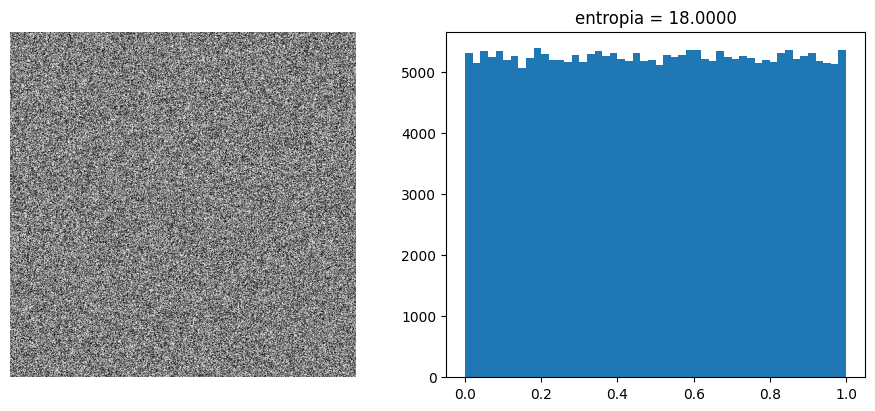

In [11]:
im = np.random.rand(512, 512)

fig, ax = plt.subplots(1, 2, figsize=(9, 4), constrained_layout=True)
ax[0].imshow(im, cmap="gray", vmin=0, vmax=1)
ax[0].axis("off")
ax[1].hist(im.ravel(), bins=50)
ax[1].set_title(f"entropia = {shannon_entropy(im):.4f}")
plt.show()


Immagine a singolo livello di grigio

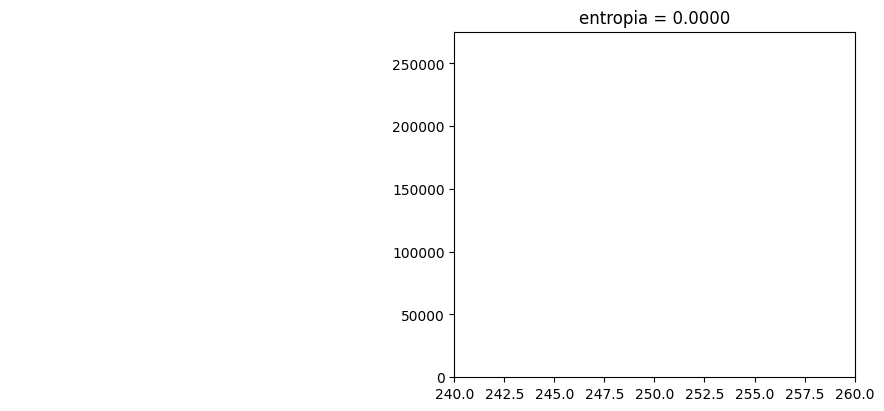

In [12]:
im = 255 * np.ones((512, 512), dtype=float)

fig, ax = plt.subplots(1, 2, figsize=(9, 4), constrained_layout=True)
ax[0].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[0].axis("off")
ax[1].hist(im.ravel(), bins=50)
ax[1].set_xlim(240, 260)
ax[1].set_title(f"entropia = {shannon_entropy(im):.4f}")
plt.show()


Immagine con 2 livelli di grigio

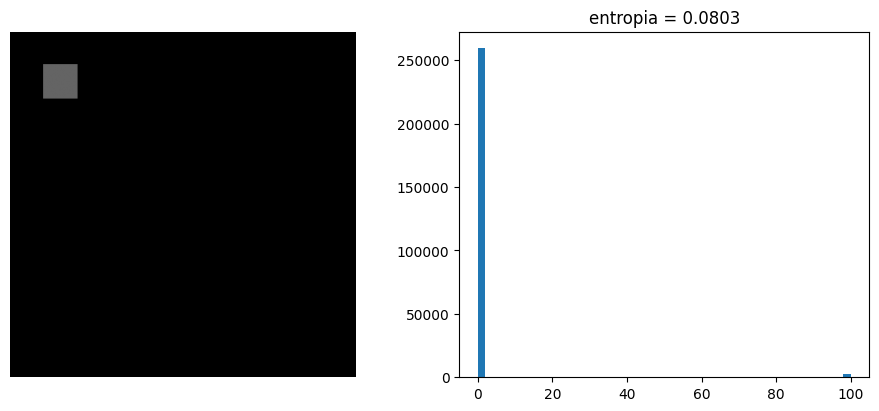

In [13]:
im = np.zeros((512, 512), dtype=float)
im[49:100, 49:100] = 100 

fig, ax = plt.subplots(1, 2, figsize=(9, 4), constrained_layout=True)
ax[0].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[0].axis("off")
ax[1].hist(im.ravel(), bins=50)
ax[1].set_title(f"entropia = {shannon_entropy(im):.4f}")
plt.show()


Immagine con due livelli di grigio e rumore Gaussiano

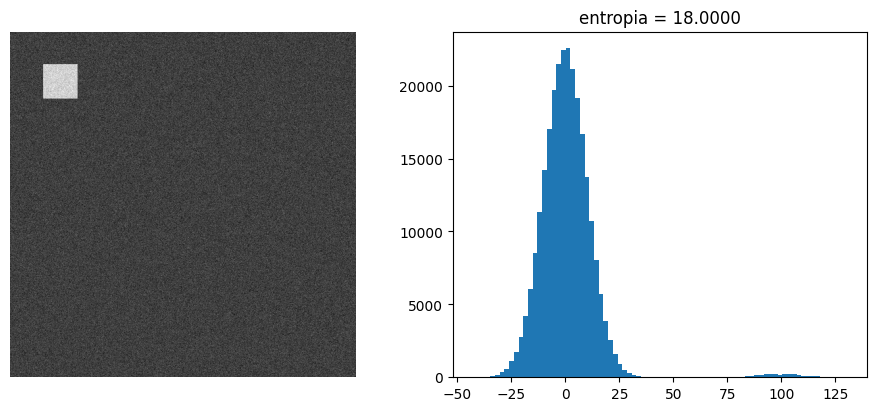

In [14]:
im = np.zeros((512, 512), dtype=float)
im[49:100, 49:100] = 100
im = im + 10 * np.random.randn(512, 512)

fig, ax = plt.subplots(1, 2, figsize=(9, 4), constrained_layout=True)
ax[0].imshow(im, cmap="gray")  
ax[0].axis("off")
ax[1].hist(im.ravel(), bins=80)
ax[1].set_title(f"entropia = {shannon_entropy(im):.4f}")
plt.show()


Immagine con due livelli di grigio, rumore Gaussiano e PVE

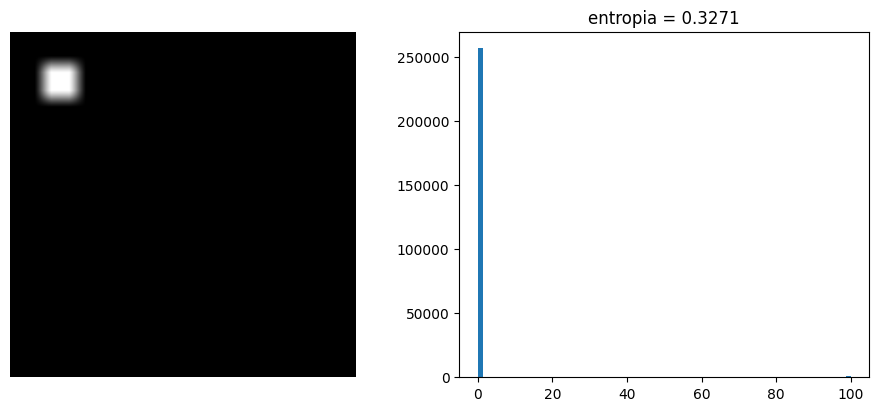

In [15]:
im = np.zeros((512, 512), dtype=float)
im[49:100, 49:100] = 100

ksize = 25
sigma = 11

g = gaussian(ksize, sigma)
h = np.outer(g, g)
h = h / h.sum()

im = convolve(im, h, mode="reflect")

fig, ax = plt.subplots(1, 2, figsize=(9, 4), constrained_layout=True)
ax[0].imshow(im, cmap="gray")
ax[0].axis("off")
ax[1].hist(im.ravel(), bins=80)
ax[1].set_title(f"entropia = {shannon_entropy(im):.4f}")
plt.show()
